In [1]:
from roi import equity, external, utilities, macro, metrics, cost, surveys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# make figures readable by humans instead of mice
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 100

In [2]:
bls_api_key = "c8803d0ba66c4592b8b0eff68ac9ebb0"

In [3]:
data = pd.read_csv("testing/testing-data/test_microdata.csv")

In [4]:
programs = pd.read_csv("testing/testing-data/programs.csv")

__Equity analysis__

In [7]:
gini = equity.Gini.from_dataframe(data, 'gender', 'earnings_end', sample = 2000)
gini.calculate()

/Users/mattlerner/roi/sbir-roi/roi/equity.py:77: UserWarning: When sample == True, Metric() will use the value of sample to create a random subset of values that it will use for all calculations. This number will be stored as attribute .samplesize.
  warnings.warn("When sample == True, Metric() will use the value of sample to create a random subset of values that it will use for all calculations. This number will be stored as attribute .samplesize.")
/Users/mattlerner/roi/sbir-roi/roi/equity.py:61: UserWarning: Data passed contains 93 NA values. All equity metrics are calculated by ignoring NA values, in effect dropping them. Please ensure that you have a strategy for dealing with these missing values. If values are not missing at random, e.g. if individuals with missing values have common traits, then ALL METRICS calculated will be biased.
  warnings.warn("Data passed contains {} NA values. All equity metrics are calculated by ignoring NA values, in effect dropping them. Please ensure

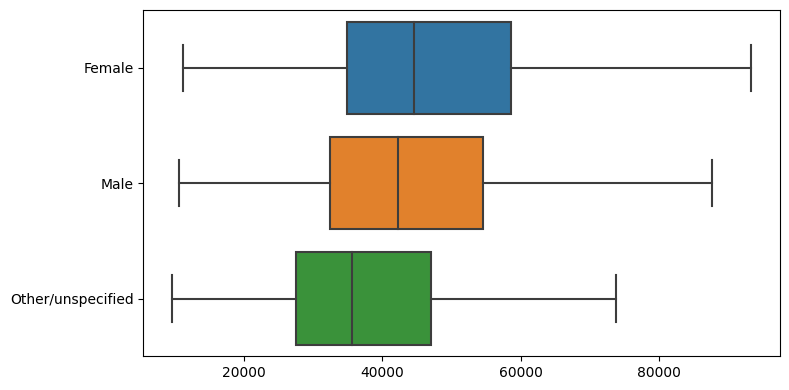

In [8]:
gini.viz

In [9]:
gini.ratio

0.29002557817835717

__Geocode addresses__

In [11]:
small_data = data.sample(30)

In [14]:
small_data.head()

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,state,full_address,Address,City,State,Zip,id,start_month,end_month,geocode
8943,8944,Asian or Pacific Islander,Male,12074.000,30753.600,38,Philosophy,2011,2013,92,...,8,NaN,NaN,NaN,NaN,nan,3654,8,7,
9326,9327,White,Other/unspecified,24200.000,nan,18,Electrical Engineering,2016,2018,111,...,8,NaN,NaN,NaN,NaN,nan,14545,8,6,
7960,7961,Black,Female,27183.000,nan,32,Economics,2014,2020,92,...,8,111 W WASHINGTON ST STE 310 EAST PEORIA IL 61611,111 W WASHINGTON ST STE 310,EAST PEORIA,IL,61611.000,6075,8,5,171790201003
15063,15064,Black,Other/unspecified,38896.000,46363.845,40,Art History,2018,2021,125,...,8,"16000 W 9 MILE RD, SUITE 620 SOUTHFIELD MI 48075","16000 W 9 MILE RD, SUITE 620",SOUTHFIELD,MI,48075.000,4182,10,6,261251621001
16374,16375,Asian or Pacific Islander,Other/unspecified,23034.000,34476.000,18,Philosophy,2014,2017,125,...,8,NaN,NaN,NaN,NaN,nan,6088,9,6,


In [13]:
small_data['geocode'] = external.Census.get_batch_geocode(small_data)

Successfully geocoded 40.0% of 30 passed addresses.
Of successfully matched addresses, 66.67% were exact matches


__Get SES for each individual with a geocode__

In [15]:
adi = equity.ADI()

In [16]:
small_data['ses'] = adi.get_quintile_for_geocodes_frame(small_data, 'geocode')

Geocode merge: Merged 12 of 30 observations in input dataframe (40.0%)


In [17]:
small_data.head()

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,full_address,Address,City,State,Zip,id,start_month,end_month,geocode,ses
8943,8944,Asian or Pacific Islander,Male,12074.000,30753.600,38,Philosophy,2011,2013,92,...,NaN,NaN,NaN,NaN,nan,3654,8,7,,NaN
9326,9327,White,Other/unspecified,24200.000,nan,18,Electrical Engineering,2016,2018,111,...,NaN,NaN,NaN,NaN,nan,14545,8,6,,NaN
7960,7961,Black,Female,27183.000,nan,32,Economics,2014,2020,92,...,111 W WASHINGTON ST STE 310 EAST PEORIA IL 61611,111 W WASHINGTON ST STE 310,EAST PEORIA,IL,61611.000,6075,8,5,171790201003,80-100
15063,15064,Black,Other/unspecified,38896.000,46363.845,40,Art History,2018,2021,125,...,"16000 W 9 MILE RD, SUITE 620 SOUTHFIELD MI 48075","16000 W 9 MILE RD, SUITE 620",SOUTHFIELD,MI,48075.000,4182,10,6,261251621001,80-100
16374,16375,Asian or Pacific Islander,Other/unspecified,23034.000,34476.000,18,Philosophy,2014,2017,125,...,NaN,NaN,NaN,NaN,nan,6088,9,6,,NaN


__Check out SES equity concerns__

In [18]:
theil_t = equity.Theil_T.from_dataframe(small_data, 'ses', 'earnings_end')

/Users/mattlerner/roi/sbir-roi/roi/equity.py:61: UserWarning: Data passed contains 2 NA values. All equity metrics are calculated by ignoring NA values, in effect dropping them. Please ensure that you have a strategy for dealing with these missing values. If values are not missing at random, e.g. if individuals with missing values have common traits, then ALL METRICS calculated will be biased.
  warnings.warn("Data passed contains {} NA values. All equity metrics are calculated by ignoring NA values, in effect dropping them. Please ensure that you have a strategy for dealing with these missing values. If values are not missing at random, e.g. if individuals with missing values have common traits, then ALL METRICS calculated will be biased.".format(self.nans))


In [19]:
theil_t.calculate()

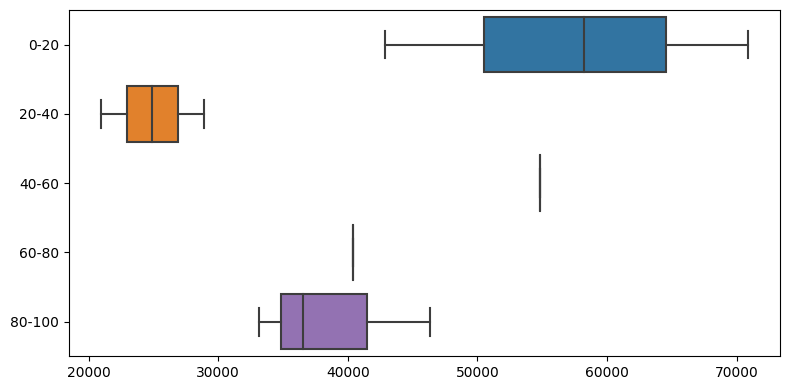

In [20]:
theil_t.viz

In [22]:
theil_t.ratio

-0.09716187149203633

__Calculate graduate wage summary statistics__

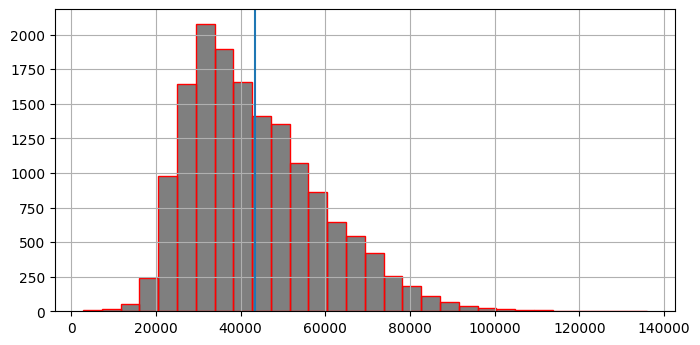

In [23]:
fig, ax = plt.subplots()
data['earnings_end'].hist(ax=ax, edgecolor="red", fc=(0, 0, 0, 0.5), bins=30)
plt.axvline(x=np.mean(data['earnings_end']))

In [24]:
utilities.multiple_describe(data, 'program', 'earnings_end')

,program,n,mean,median,sd,min,max
0,Anthropology,2288.000,31540.395,31381.600,6542.271,2817.240,63547.440
1,Art History,2370.000,42312.370,41632.800,9460.368,4287.800,75483.430
2,Biology,2404.000,35848.828,35303.220,7838.359,6602.715,64873.710
3,Economics,2327.000,54705.240,54158.720,11048.693,14172.620,102118.940
4,Electrical Engineering,2386.000,65698.580,64849.900,14206.740,20139.900,135887.290
5,French Literature,2339.000,27875.583,27687.748,5501.041,6088.635,50285.620
6,Philosophy,2297.000,46128.218,45486.000,10275.570,14191.200,96564.600


__Adjust wages for inflation__

In [25]:
bls = macro.BLS_Ops()
data['earnings_end_adjusted'] = bls.adjust_to_current_dollars(data, 'program_end', 'earnings_end')

Latest CPI year in provided BLS data is 2018.0: All dollars being adjusted to 2018.0 dollars.
Years in provided dataframe for which there is no data in the provided CPI frame:

{2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028}


/Users/mattlerner/roi/sbir-roi/roi/macro.py:58: UserWarning: Value column earnings_end contains 821 NA values (5.0%) of total.
  warnings.warn("Value column {} contains {} NA values ({}%) of total.".format(value_column_name, value_nas, round(100*value_nas/len(frame_),2)))
/Users/mattlerner/roi/sbir-roi/roi/macro.py:71: UserWarning: 5515 rows in column program_end could not be merged with provided CPI data. Please note that (1) the BLS API provides only up to 20 years of data; if you want to use more, you will have to manually combine multiple queries. (2) We do not recommend using more than ten years of historical data in calculations.
  warnings.warn("{} rows in column {} could not be merged with provided CPI data. Please note that (1) the BLS API provides only up to 20 years of data; if you want to use more, you will have to manually combine multiple queries. (2) We do not recommend using more than ten years of historical data in calculations.".format(unmerged_len, year_column_name))

In [26]:
data[['program_end','earnings_end','earnings_end_adjusted']].sample(10)

,program_end,earnings_end,earnings_end_adjusted
13757,2016,40511.680,42387.498
11050,2018,66274.500,66274.500
392,2018,46280.080,46280.080
8341,2013,30002.960,32340.542
10155,2018,17353.600,17353.600
12838,2020,71899.800,nan
12863,2016,57573.560,60239.396
7973,2014,56773.640,60224.073
15744,2015,29317.860,31062.033
14356,2018,66786.000,66786.000


__Recalculate average graduate wage by program__

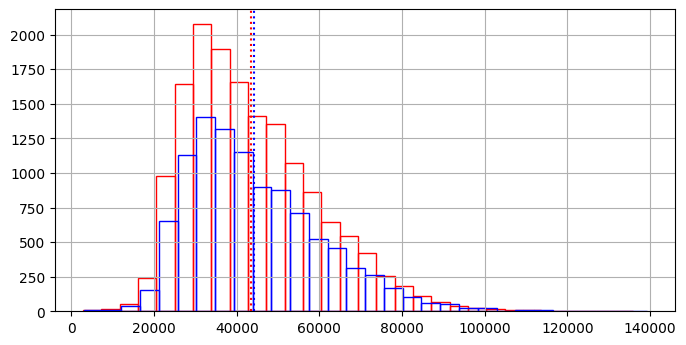

In [27]:
fig, ax = plt.subplots()

# unadjusted
data['earnings_end'].hist(ax=ax, edgecolor="red", fc=(0, 0, 0, 0), bins=30)
plt.axvline(x=np.mean(data['earnings_end']), color="red", linestyle=":")

# adjusted
data['earnings_end_adjusted'].hist(ax=ax, edgecolor="blue", fc=(0, 0, 0, 0), bins=30)
plt.axvline(x=np.mean(data['earnings_end_adjusted']), color="blue", linestyle=":")

__Calculate earnings premium - Simple way__

In [28]:
data['earnings_change'] = data['earnings_end'] - data['earnings_start']

In [29]:
utilities.multiple_describe(data, 'program', 'earnings_change')

,program,n,mean,median,sd,min,max
0,Anthropology,2288.000,1492.413,1748.180,7514.140,-46000.200,41005.440
1,Art History,2370.000,13117.589,13010.150,8743.259,-49156.200,54181.100
2,Biology,2404.000,5538.174,5503.500,7822.369,-28674.700,54911.950
3,Economics,2327.000,24685.001,24170.200,10529.107,-15061.260,77500.780
4,Electrical Engineering,2386.000,36063.777,35277.400,13514.743,-21673.600,112955.900
5,French Literature,2339.000,-2656.493,-2261.950,6824.586,-62843.250,36069.590
6,Philosophy,2297.000,16914.652,16949.000,9296.036,-22386.120,61526.600


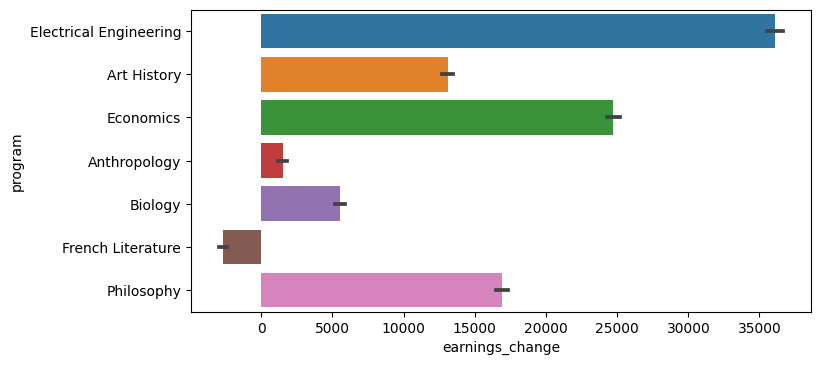

In [30]:
sns.barplot(x="earnings_change", y="program", data=data, estimator=np.mean)

__Calculate earnings premium - Fancy way__

In [33]:
data['year_month_entry'] = data['program_start'].astype(str) + '-' + data['start_month'].astype(str).str.zfill(2)
data['year_month_exit'] = data['program_end'].astype(str) + '-' + data['end_month'].astype(str).str.zfill(2)

In [34]:
data['state_fips'] = utilities.State_To_FIPS_series(data['State'])

In [35]:
data['macro_wage_change'] = bls.wage_change(data, 'state_fips','year_month_entry','year_month_exit')

In [36]:
data.sample(10)

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,Zip,id,start_month,end_month,earnings_end_adjusted,earnings_change,year_month_entry,year_month_exit,macro_wage_change,state_fips
7519,7520,Other,Other/unspecified,40559.000,78333.450,39,Electrical Engineering,2014,2020,92,...,33126.000,16243,8,7,nan,37774.450,2014-08,2020-07,nan,12
14350,14351,White,Male,31459.000,nan,26,Philosophy,2013,2016,124,...,94030.000,9468,8,7,nan,nan,2013-08,2016-07,3516.240,06
16331,16332,Other,Female,26273.000,61614.960,42,Philosophy,2015,2019,125,...,45237.000,7939,9,7,nan,35341.960,2015-09,2019-07,3965.000,39
15188,15189,Other,Male,36459.000,87031.000,48,Economics,2010,2015,125,...,nan,6094,10,6,92208.633,50572.000,2010-10,2015-06,nan,nan
5395,5396,Other,Male,27578.000,49377.600,35,Philosophy,2013,2017,73,...,75090.000,5251,10,6,50582.237,21799.600,2013-10,2017-06,3437.720,48
15880,15881,Asian or Pacific Islander,Other/unspecified,19702.000,23064.750,37,Biology,2012,2012,125,...,nan,15618,9,6,25226.230,3362.750,2012-09,2012-06,nan,nan
4078,4079,White,Female,23642.000,36767.060,35,Art History,2018,2020,73,...,81230.000,16015,8,5,nan,13125.060,2018-08,2020-05,nan,08
9301,9302,Other,Female,34973.000,78386.660,35,Electrical Engineering,2013,2016,111,...,44131.000,6860,9,7,82016.208,43413.660,2013-09,2016-07,1385.800,39
14151,14152,White,Female,16829.000,30236.360,38,French Literature,2014,2018,124,...,60139.000,15112,8,5,30236.360,13407.360,2014-08,2018-05,2484.040,17
11101,11102,White,Female,18298.000,50136.570,49,Electrical Engineering,2012,2017,123,...,43229.000,14453,10,7,51359.723,31838.570,2012-10,2017-07,3797.040,39


In [37]:
data['trend_adjusted_change'] = data['earnings_change'] - data['macro_wage_change']

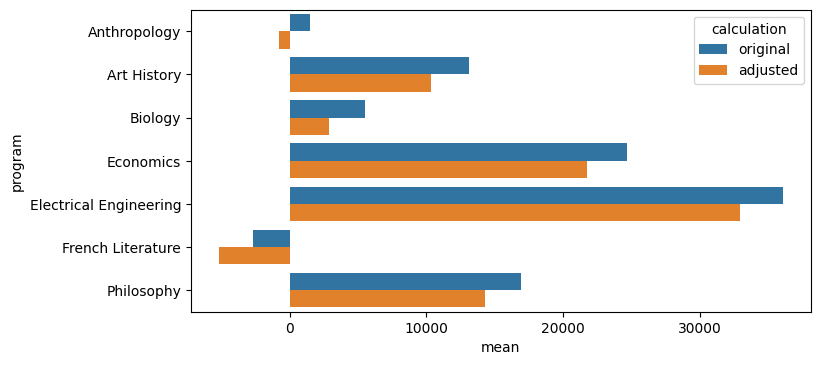

In [38]:
# ignore this ugly cod
original_summary = utilities.multiple_describe(data, 'program', 'earnings_change')
adjusted_summary = utilities.multiple_describe(data, 'program', 'trend_adjusted_change')
original_summary['calculation'] = "original"
adjusted_summary['calculation'] = "adjusted"

sns.barplot(x="mean", y="program", hue="calculation", data=pd.concat([original_summary, adjusted_summary]))

__Calculate earnings premium - VERY fancy way__

In [39]:
premium = metrics.Earnings_Premium(data, 'state_fips', 'education_level', 'earnings_start', 'earnings_end', 'program_start', 'program_end', 'age')

/Users/mattlerner/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [40]:
data['predicted_wage'] = premium.predicted_wage
data['earnings_premium'] = premium.full_premium

In [42]:
data.sample(5)

,Unnamed: 0,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,end_month,earnings_end_adjusted,earnings_change,year_month_entry,year_month_exit,macro_wage_change,state_fips,trend_adjusted_change,predicted_wage,earnings_premium
432,433,Other,Female,29091.000,48112.020,18,Art History,2012,2013,0,...,6,51860.509,19021.020,2012-08,2013-06,nan,nan,nan,32782.357,15329.663
7003,7004,White,Other/unspecified,27748.000,23234.750,18,French Literature,2012,2014,81,...,7,24646.848,-4513.250,2012-10,2014-07,594.880,01,-5108.130,34419.608,-11184.858
5914,5915,Asian or Pacific Islander,Female,27355.000,49672.920,28,Art History,2014,2019,81,...,6,nan,22317.920,2014-09,2019-06,7450.560,25,14867.360,39159.723,10513.197
1413,1414,White,Female,nan,22254.540,37,French Literature,2017,2020,0,...,6,nan,nan,2017-10,2020-06,nan,22,nan,nan,nan
15550,15551,White,Other/unspecified,32524.000,28254.000,18,Anthropology,2015,2017,125,...,5,28943.296,-4270.000,2015-10,2017-05,3141.840,27,-7411.840,39498.282,-11244.282


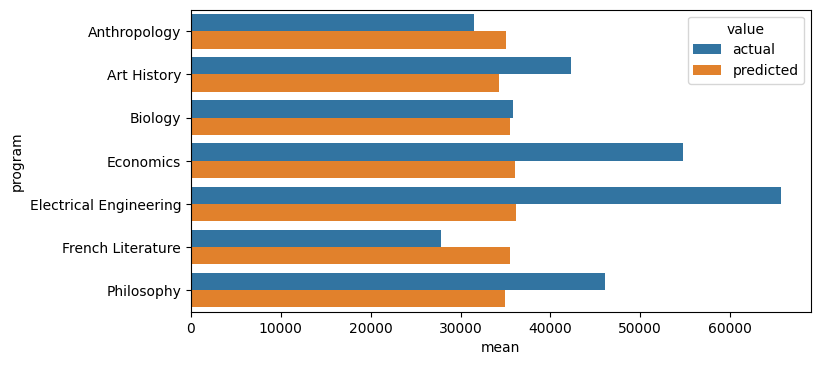

In [43]:
# Mean predicted vs actual wage by program
original_summary = utilities.multiple_describe(data, 'program', 'earnings_end')
adjusted_summary = utilities.multiple_describe(data, 'program', 'predicted_wage')
original_summary['value'] = "actual"
adjusted_summary['value'] = "predicted"

sns.barplot(x="mean", y="program", hue="value", data=pd.concat([original_summary, adjusted_summary]))

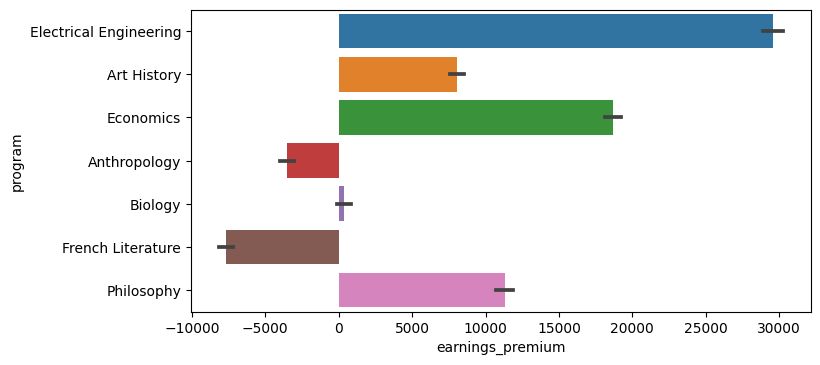

In [44]:
sns.barplot(x="earnings_premium", y="program", data=data, estimator=np.mean)

__Calculate employment premium__

In [45]:
employment = metrics.Employment_Likelihood(data, 'program', 'year_month_entry', 'year_month_exit', 'employed_at_end', 'employed_at_start', 'state')

/Users/mattlerner/roi/sbir-roi/roi/utilities.py:135: UserWarning: State codes, though integers, should be passed as strings. Something else was passed. Attempting to coerce to string.
  warnings.warn("State codes, though integers, should be passed as strings. Something else was passed. Attempting to coerce to string.")


In [46]:
premium = employment.employment_premium

Text(0.5, 1.0, 'Average employment premium')

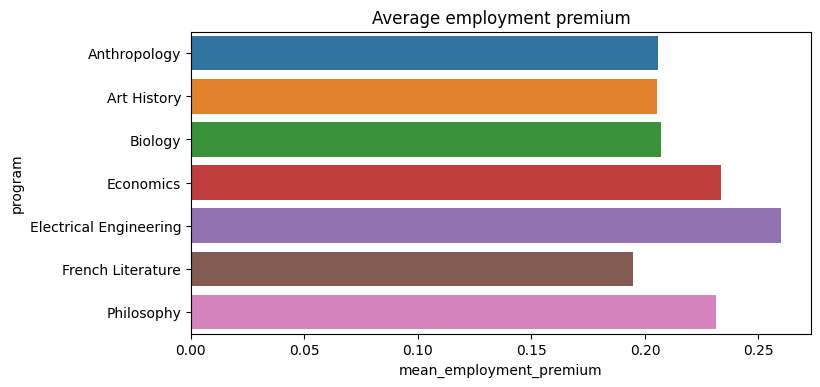

In [47]:
sns.barplot(x="mean_employment_premium", y="program", data=premium).set_title("Average employment premium")

__Calculate time to completion and completion rate statistics__

In [48]:
completion = metrics.Completion(data, 'program', 'program_start', 'program_end', 'completer')

In [49]:
completion_time = completion.time_to_completion
completion_time

,program,n,mean,median,sd,min,max
0,Anthropology,2288,3.101,3,1.764,-1,10
1,Art History,2370,3.361,3,1.711,0,10
2,Biology,2404,3.192,3,1.725,-1,11
3,Economics,2327,3.713,3,1.792,0,12
4,Electrical Engineering,2386,4.009,4,1.732,0,11
5,French Literature,2339,3.041,3,1.709,-1,10
6,Philosophy,2297,3.527,3,1.713,0,11


In [50]:
completion_rate = completion.completion_rates
completion_rate

,program,n,mean,median,sd,min,max
0,Anthropology,2288,0.669,1,0.471,0,1
1,Art History,2370,0.682,1,0.466,0,1
2,Biology,2404,0.671,1,0.470,0,1
3,Economics,2327,0.634,1,0.482,0,1
4,Electrical Engineering,2386,0.592,1,0.492,0,1
5,French Literature,2339,0.702,1,0.458,0,1
6,Philosophy,2297,0.654,1,0.476,0,1


Text(0.5, 1.0, 'Average time to complete')

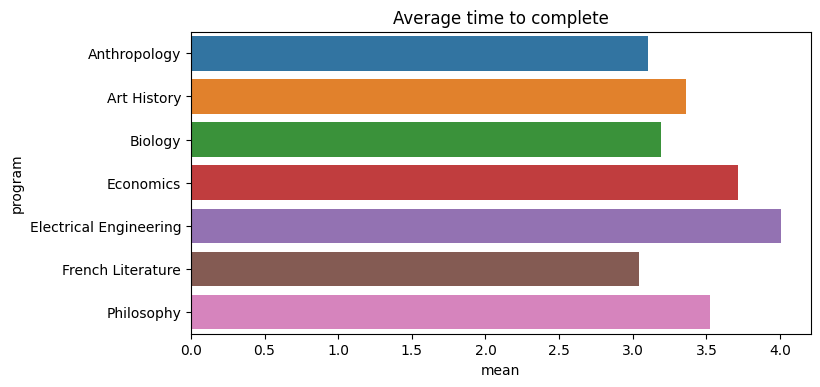

In [51]:
sns.barplot(x="mean", y="program", data=completion_time).set_title("Average time to complete")

Text(0.5, 1.0, 'Average completion rate')

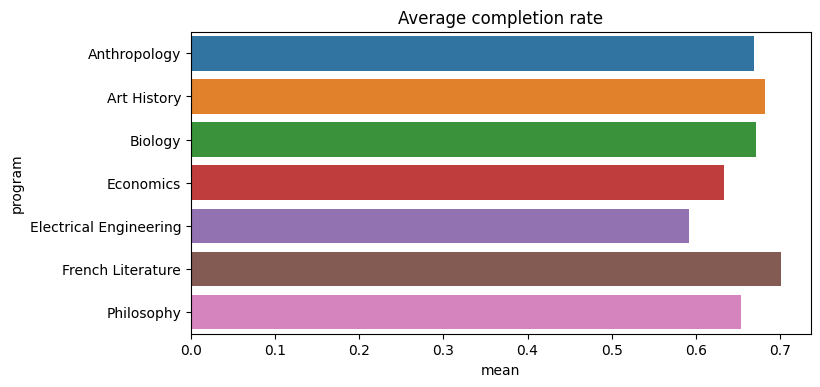

In [52]:
sns.barplot(x="mean", y="program", data=completion_rate).set_title("Average completion rate")

__Try out loan amounts__

In [53]:
data_programs = data.merge(programs, left_on="program", right_on="programs", how="left")
data_programs['total_cost'] = data_programs['cost_per_semester'] * data_programs['length']
data_programs['period_payment'] = cost.Compound_Interest_Loan.calculate_period_payment(data_programs['total_cost'], 0.05, 10)

In [54]:
data_programs.sample(10)

,Unnamed: 0_x,race,gender,earnings_start,earnings_end,age,program,program_start,program_end,education_level,...,empchange,emp_premium,time_to_completion,Unnamed: 0_y,programs,degree,length,cost_per_semester,total_cost,period_payment
3667,3668,Black,Other/unspecified,29133.000,36904.620,18,Philosophy,2016,2021,60,...,0,nan,5,7,Philosophy,BA,8,8000,64000,8288.293
6494,6495,White,Other/unspecified,28152.000,24118.920,31,Anthropology,2014,2020,81,...,0,nan,6,4,Anthropology,BA,4,4500,18000,2331.082
44,45,Asian or Pacific Islander,Male,40937.000,99308.900,18,Electrical Engineering,2015,2017,0,...,0,0.010,2,1,Electrical Engineering,BA,8,5000,40000,5180.183
8339,8340,Black,Other/unspecified,31313.000,26278.600,18,Anthropology,2013,2014,92,...,0,0.014,1,4,Anthropology,BA,4,4500,18000,2331.082
357,358,Other,Male,41596.000,60493.400,42,Art History,2015,2017,0,...,0,0.010,2,2,Art History,BA,8,7000,56000,7252.256
8387,8388,Other,Other/unspecified,nan,35009.120,37,Anthropology,2012,2019,92,...,0,0.043,7,4,Anthropology,BA,4,4500,18000,2331.082
1002,1003,Other,Female,39645.000,46299.440,36,Anthropology,2015,2019,0,...,0,0.004,4,4,Anthropology,BA,4,4500,18000,2331.082
6536,6537,Other,Other/unspecified,26209.000,23892.480,18,Anthropology,2015,2020,81,...,0,nan,5,4,Anthropology,BA,4,4500,18000,2331.082
6736,6737,White,Other/unspecified,37173.000,33767.865,24,Biology,2013,2014,81,...,0,0.015,1,5,Biology,AS,3,3000,9000,1165.541
8180,8181,Black,Male,29574.000,28436.000,18,Anthropology,2018,2019,92,...,0,0.003,1,4,Anthropology,BA,4,4500,18000,2331.082


In [55]:
data_programs['premium_with_payments'] = data_programs['earnings_premium'] - data_programs['period_payment']

In [56]:
summary_w_payments = utilities.multiple_describe(data_programs, 'program', 'premium_with_payments')

Text(0.5, 1.0, 'Return including loan payments')

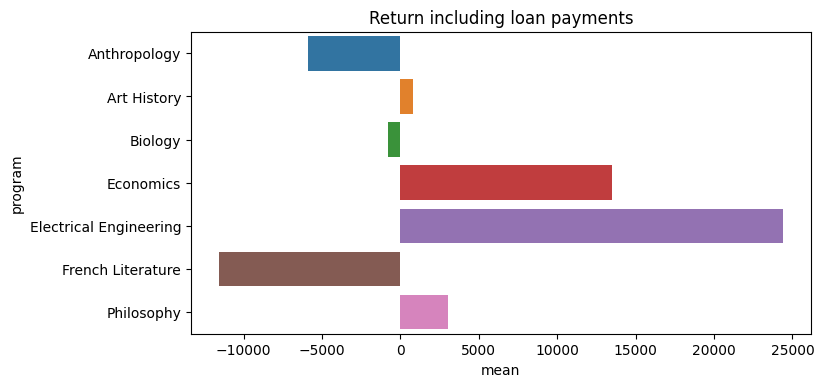

In [57]:
sns.barplot(x="mean", y="program", data=summary_w_payments).set_title("Return including loan payments")

__High school baselines__

In [58]:
cps = surveys.CPS_Ops()

/Users/mattlerner/roi/sbir-roi/roi/utilities.py:135: UserWarning: State codes, though integers, should be passed as strings. Something else was passed. Attempting to coerce to string.
  warnings.warn("State codes, though integers, should be passed as strings. Something else was passed. Attempting to coerce to string.")


In [59]:
cps.rudimentary_hs_baseline('08', [1, 5, 10])

[15017.630256967966, 21688.246894625805, 34336.28062777556]

In [66]:
states = ['CA','TX','AK','MS','CO','NY','NJ','PA']
fips = utilities.State_To_FIPS_series(states)

State_To_FIPS_series usually takes a pandas series. Something else was passed. Now trying under assumption that passed object is list or array


In [67]:
fips

['06', '48', '02', '28', '08', '36', '34', '42']

In [68]:
baselines = pd.DataFrame([cps.rudimentary_hs_baseline(state, [1, 5, 10]) for state in fips])
baselines['state'] = states
baselines.columns = ['1','5','10','State']

In [69]:
baselines_melted = pd.melt(baselines, id_vars=['State'], var_name="year", value_name="earnings")
baselines_melted['year'] = baselines_melted['year'].astype(int)
baselines_melted['earnings'] = baselines_melted['earnings'].astype(int)

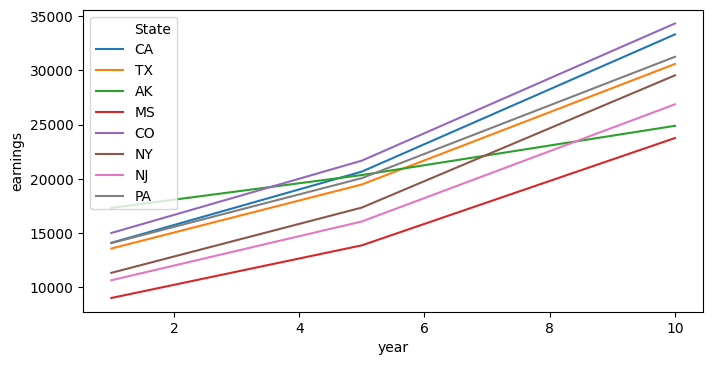

In [70]:
sns.lineplot(data=baselines_melted, x="year", y="earnings", hue="State")

__Completion rate vs earnings premium__

In [71]:
merged_rate_premium = completion_rate.merge(premium, on="program")

[Text(0, 0.5, 'Increased likelihood of employment'),
 Text(0.5, 0, 'Completion rate'),
 Text(0.5, 1.0, 'Completion rate vs employment premium')]

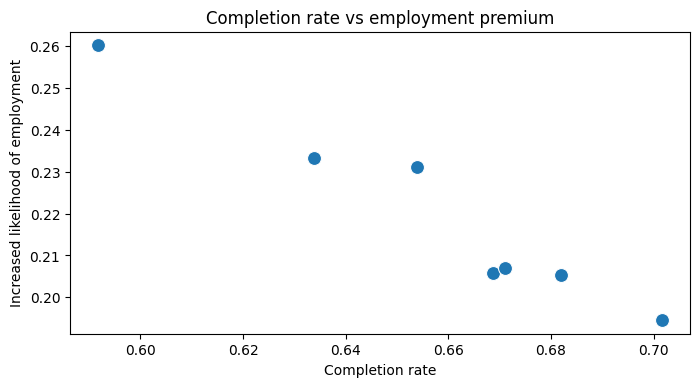

In [72]:
fig, ax = plt.subplots()
sns.scatterplot(data=merged_rate_premium, x="mean", y="mean_employment_premium", ax=ax, s=100)
ax.set(xlabel='Completion rate', ylabel='Increased likelihood of employment', title='Completion rate vs employment premium')